In [1]:
# -*- coding: utf-8 -*-
# Auther : ZhangYiLong
# Mail : 503302425@qq.com
# Date : 2022/11/18 15:39
# File : jsonDataProcessing.py
#cankai https://blog.csdn.net/weixin_42608414/article/details/88100879
# kaggle
#
%matplotlib inline

from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('chinese'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


In [2]:
# 加载数据
filepath = "data/crime_classify.json"
df = pd.read_json(filepath,encoding='utf8',lines=True)


In [4]:
#划分为 7:3
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'],test_size=0.3,random_state=20)


In [25]:
df_train= pd.DataFrame()
df_train['text']=x_train
df_train['label']=y_train
df_train.to_excel("data/crime_classify_train.json",encoding='utf8')


In [33]:
df_test= pd.DataFrame()
df_test['text']=x_test
df_test['label']=y_test
df_test.to_excel("data/crime_classify_test.json",encoding='utf8')


ValueError: 'lines' keyword only valid when 'orient' is records

In [29]:
out = {'labels': df.index.tolist(), 'datasets': []}
for col in df.columns:
    out['datasets'].append({
        'label': col,
        'data': df[col].values.tolist()
    })

,text,label
74968,经审理查明，原判认定上诉人李某犯××罪的事实清楚，据以定案的证人叶某、庄某、陈某、李某1、黄...,[拒不执行[判决、裁定]]
21520,公诉机关指控，2017年3月，被告人刘某利用微信建立多个名为“福利影院拉五男免踢”的微信群，...,"[[制造、贩卖、传播]淫秽物品, 传播淫秽物品]"
103016,成都市金牛区人民检察院指控，2011年，被告人黄某某任成都市金牛区社会保险事业管理局（下文简...,"[受贿, 行贿]"
122442,经审理查明，2016年2月份，网上逃犯王某找到被告人张某某让其帮忙租一套住房，张某某以自己的...,[[窝藏、包庇]]
108483,亳州市谯城区人民检察院指控：2012年1月3日9时20分，亳州市公安局立德派出所配合谯城区立...,[爆炸]
...,...,...
124308,安徽省安庆市大观区人民检察院指控，2011年2月底，被告人江某甲经网友章某某介绍加入沈阳绿生...,[[组织、领导]传销活动]
31962,长沙市雨花区人民检察院指控，1、2017年2月7日23时许，被告人杨2某以400元的价格贩卖...,[[走私、贩卖、运输、制造]毒品]
23775,宜阳县人民检察院指控：2016年9月6日19时20分许，被告人张某驾驶豫Ａ×××××号小型轿...,[交通肇事]
37135,经审理查明：1、2014年7月2日，被告人黄某明知王某没有毒品来源，由王某出毒资，居间介绍帮...,"[[走私、贩卖、运输、制造]毒品, 容留他人吸毒]"


In [21]:
df[list[array]]

,text,label
0,昌宁县人民检察院指控，2014年4月19日下午16时许，被告人段某驾拖车经过鸡飞乡澡塘街子，...,[故意伤害]
1,"公诉机关指控,2015年11月10日晚9时许，被告人李某的妹妹李某某与被害人华某某在桦川县悦...",[故意伤害]
2,贵州省平坝县人民检察院指控：2014年4月9日下午，被告人王某丁与其堂哥王4某（另案处理）假...,[故意伤害]
3,经审理查明：2014年5月6日14时许，被告人叶某某驾车途径赤壁市赵李桥镇胜利街涵洞时，被在...,[故意伤害]
4,安阳县人民检察院指控：2014年4月27日上午11时许，宋某甲在安阳县吕村镇翟奇务村被告人梁...,[故意伤害]
...,...,...
154587,经审理查明，2013年9月，被告人黄某从一陌生人处购得猎捕工具“电猫”一台，随即于每年的农历...,[非法狩猎]
154588,歙县人民检察院指控：被告人叶某违反狩猎法规，在禁猎期内使用禁用的方法，猎捕安徽省二级保护的野...,[非法狩猎]
154589,永平县人民检察院指控：2017年4月10日，被告人江天某携带单管猎枪、录音机等工具到永平县杉...,"[非法[持有、私藏][枪支、弹药], 非法[猎捕、杀害][珍贵、濒危]野生动物]"
154590,神农架林区人民检察院指控：2015年11月中旬至12月，被告人朱某在神农架林区红坪镇红举村“...,[非法[猎捕、杀害][珍贵、濒危]野生动物]


In [10]:

tags = df['label'].values
tag_dic={}
for tag_list in tags:
    for tag in tag_list:
        if tag not in tag_dic:
            tag_dic[tag]=1
        else:
             tag_dic[tag]+=1
df2 = pd.DataFrame(list(tag_dic.items()), columns=['label', 'count']).sort_values(by = 'count',axis = 0,ascending = False)

print('标签总数:',len(df2))
df2.head(10)


标签总数: 202


,label,count
1,盗窃,10051
13,[走私、贩卖、运输、制造]毒品,8872
0,故意伤害,6377
14,抢劫,5020
22,诈骗,3536
37,受贿,3496
5,寻衅滋事,3290
2,危险驾驶,2758
26,[组织、强迫、引诱、容留、介绍]卖淫,2647
32,[制造、贩卖、传播]淫秽物品,2617


G:\proprocess\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30423 (\N{CJK UNIFIED IDEOGRAPH-76D7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
G:\proprocess\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31363 (\N{CJK UNIFIED IDEOGRAPH-7A83}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
G:\proprocess\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36208 (\N{CJK UNIFIED IDEOGRAPH-8D70}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
G:\proprocess\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31169 (\N{CJK UNIFIED IDEOGRAPH-79C1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
G:\proprocess\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
G:\proprocess\venv\lib\site-p

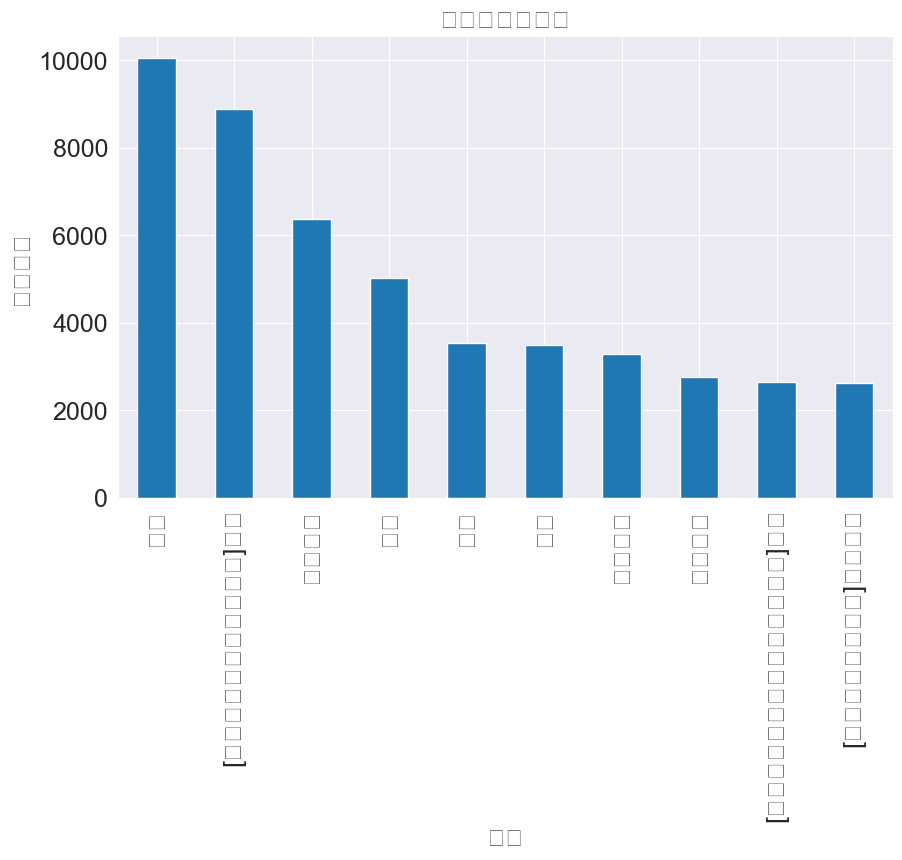

In [5]:

#前10个数量最多的标签分布
df2[:10].plot(x='label', y='count', kind='bar', legend=False, grid=True, figsize=(10, 6),fontsize=18)
plt.title("每个标签的分布",fontsize=18)
plt.ylabel('出现次数', fontsize=18)
plt.xlabel('标签', fontsize=18)
plt.show()

# 数据预处理
数据预处理是在训练分类器模型之前的一个必要过程,对于像英语这样的文本,数据预处理一般包含下面几个步骤:

将英文字母小写化处理,
删除文本中所有的标点符号.
删除文本中包含的停用词.
提取词干(stemming),单词被简化为根形式,如cats-->cat,meeting-->meet,等
词形还原(Lemmatization),第三人称的单词转换成第一人称单词,动词的过去式和将来式将转换成现在式。
文本特征抽取(CountVectorizer,TfidfVectorizer)


In [6]:
#用空格替换各种符号
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
#删除各种符号
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('chinese'))
#定义数据清洗函数
def text_prepare(text):
    # text = text.lower() # 字母小写化
    text = REPLACE_BY_SPACE_RE.sub(' ',text)
    text = BAD_SYMBOLS_RE.sub('',text)
    text = ' '.join([w for w in text.split() if w not in STOPWORDS]) # 删除停用词
    return text

def get_stopword():
      s = set()
      with open('data/stopwords.txt',encoding = 'UTF-8') as f:
          for line in f:
              s.add(line.strip())
      return s
def remove_stopword(words):
      return [word for word in words if word not in STOPWORDS]

In [25]:
STOPWORDS = get_stopword()

In [26]:
STOPWORDS

{'',
 '屡次',
 '不大',
 '起见',
 '较之',
 '颇',
 '如前所述',
 '二话没说',
 '即是说',
 '偶尔',
 '不可开交',
 '截至',
 '｛',
 '不如',
 '即使',
 '为着',
 '相对而言',
 '一方面',
 '］',
 '按说',
 '可好',
 '由于',
 '＆',
 '啦',
 '看上去',
 '不得已',
 '不单',
 '凭借',
 '精光',
 '《',
 '哼唷',
 '并没有',
 '为',
 '能',
 '马上',
 '不拘',
 '们',
 '”',
 '倘若',
 '不外乎',
 '两者',
 '高低',
 '话说',
 '出',
 '咳',
 '呀',
 '开始',
 '遵照',
 '除去',
 '一切',
 '大体',
 '不管怎样',
 '借',
 '如果',
 '乘隙',
 '打从',
 '慢说',
 '人民',
 '个人',
 '将',
 '虽',
 '朝着',
 '只限',
 '不然的话',
 '乘',
 '倘或',
 '零',
 '俺们',
 '>',
 '出去',
 '累次',
 '兮',
 '呜呼',
 '成心',
 '怪',
 '往',
 '..',
 '除此以外',
 '二',
 '来不及',
 '不惟',
 '昂然',
 '某',
 '全身心',
 '不论',
 '人家',
 '难怪',
 '焉',
 '譬如',
 '藉以',
 '仅仅',
 '既是',
 '迫于',
 '顷刻间',
 '非徒',
 '日见',
 '差不多',
 '敢情',
 '大举',
 '有的',
 '因此',
 '到底',
 '据悉',
 '〉',
 '换言之',
 '结果',
 '嘘',
 '自个儿',
 '几经',
 '哉',
 '上',
 '。',
 '随着',
 '嗳',
 '很多',
 '尽快',
 '何苦',
 '恰巧',
 '虽则',
 '这会儿',
 '默默地',
 '进而',
 '当下',
 '尔后',
 '愤然',
 '乃',
 '加之',
 '同时',
 '姑且',
 '＊',
 '沙沙',
 '反过来说',
 '此',
 '不过',
 '从严',
 '倒是',
 '尽心尽力',
 '不但',
 '极了',
 '砰',
 '连日',
 '至',
 '甚么',
 '以及'

我们会用空格来替换一些符号,空格可以用来分隔单词,我们还要删除一些特殊符号(如一些不可见符号,回车，换行符之类的)，此处要注意一点,我们匹配的是除了“0-9a-z”和“#+_”之外的所有符号,那也就是说“0-9a-z”和“#+_”会被保留下来,为什么要保留“#+_”这些符号呢，大家可以思考一下。然后我们还要删除停用词。接下来我们开始清洗数据:



In [27]:
df["text"].apply(remove_stopword)

0         [昌, 县, 人, 民, 检, 察, 院, 指, 控, 2, 0, 1, 4, 年, 4, ...
1         [公, 诉, 机, 关, 指, 控, 2, 0, 1, 5, 年, 1, 1, 月, 1, ...
2         [贵, 州, 省, 平, 坝, 县, 人, 民, 检, 察, 院, 指, 控, 2, 0, ...
3         [审, 理, 查, 明, 2, 0, 1, 4, 年, 5, 月, 6, 日, 1, 4, ...
4         [安, 阳, 县, 人, 民, 检, 察, 院, 指, 控, 2, 0, 1, 4, 年, ...
                                ...                        
154587    [审, 理, 查, 明, 2, 0, 1, 3, 年, 9, 月, 告, 人, 黄, 陌, ...
154588    [歙, 县, 人, 民, 检, 察, 院, 指, 控, 告, 人, 叶, 违, 反, 狩, ...
154589    [永, 平, 县, 人, 民, 检, 察, 院, 指, 控, 2, 0, 1, 7, 年, ...
154590    [神, 农, 架, 林, 区, 人, 民, 检, 察, 院, 指, 控, 2, 0, 1, ...
154591    [审, 理, 查, 明, 2, 0, 1, 4, 年, 8, 月, 2, 5, 日, 晚, ...
Name: text, Length: 154592, dtype: object

In [31]:
df

,text,label
0,昌宁县人民检察院指控，2014年4月19日下午16时许，被告人段某驾拖车经过鸡飞乡澡塘街子，...,[故意伤害]
1,"公诉机关指控,2015年11月10日晚9时许，被告人李某的妹妹李某某与被害人华某某在桦川县悦...",[故意伤害]
2,贵州省平坝县人民检察院指控：2014年4月9日下午，被告人王某丁与其堂哥王4某（另案处理）假...,[故意伤害]
3,经审理查明：2014年5月6日14时许，被告人叶某某驾车途径赤壁市赵李桥镇胜利街涵洞时，被在...,[故意伤害]
4,安阳县人民检察院指控：2014年4月27日上午11时许，宋某甲在安阳县吕村镇翟奇务村被告人梁...,[故意伤害]
...,...,...
154587,经审理查明，2013年9月，被告人黄某从一陌生人处购得猎捕工具“电猫”一台，随即于每年的农历...,[非法狩猎]
154588,歙县人民检察院指控：被告人叶某违反狩猎法规，在禁猎期内使用禁用的方法，猎捕安徽省二级保护的野...,[非法狩猎]
154589,永平县人民检察院指控：2017年4月10日，被告人江天某携带单管猎枪、录音机等工具到永平县杉...,"[非法[持有、私藏][枪支、弹药], 非法[猎捕、杀害][珍贵、濒危]野生动物]"
154590,神农架林区人民检察院指控：2015年11月中旬至12月，被告人朱某在神农架林区红坪镇红举村“...,[非法[猎捕、杀害][珍贵、濒危]野生动物]


In [ ]:
X_train = [remove_stopword(x) for x in x_train]
x_test = [remove_stopword(x) for x in x_test]
X_train[:10]

# 特征抽取
我们的文本数据不能直接喂给分类器,因为分类器"消化"不了文本数据,所以必须对文本数据进行量化处理,量化处理文本数据有两种方式,一种是计算单词词频的方式,我们使用sklearn的CountVectorizer方法来统计文本中所有单词在文本中出现的次数即词频。第二种方式是计算TF-IDF,即计算每个词的逆向词频的权重,换句话说TF-IDF值表示的是每个单词在文本中的重要程度，我们使用sklearn的TfidfVectorizer方法来计算每个单词的TF-IDF值。这两种方法都是对文本量化处理的基本方法，只有经过这两种方法量化处理过的文本才能被"喂"给分类器模型进行学习和训练。不过我们只要任选其中的一种方法就可以实现对模型的训练和预测。为了让大家能够了解这两种方法，我们把这两种方法都介绍一下。

CountVectorizer
计算文本中每个单词的词频(wordcount),并生成基于词频的稀疏矩阵，其中参数:

min_df : 过滤掉那些词频小于指定阈值的单词,如min_df=5表示过滤掉词频小于5次的单词(绝对值)

max_df : 过滤掉那些词频大于指定阈值的单词,如max_df=0.9表示过滤掉词频大于那些在90%以上文档中都出现的单词(相对值)

token_pattern :  CountVectorizer在分隔单词的一种取舍模式。

min_df和max_df的值如果是整数则表示绝对值,表示次数，如果是浮点型则表示相对值,表示相对与所有文档的百分比。之所以要设置这两个参数,是因为通过设定min_df 可以过滤掉一些由于笔误造成的错误单词。通过设定max_df可以过滤掉一些词频教高的常用词,这些词频较高的常用词,它们的TF-IDF值会很低,即意味着它们对文本来说是无关紧要的,如一些感叹词，语助词什么的，如果不过滤这些词，则因为特征(feature)的数量太多。从而增加计算的复杂度,和系统开销。

token_pattern参数是一个正则表达式,它告诉CountVectorizer在分词的时候按照给定的正则表达式来分词。token_pattern= '(\S+)'表示匹配任意多个符号,如“c++”、"c#"会被匹配到，如果不设置token_pattern参数那么文本中的“c++”、"c#"都会被匹配成"c",这会给我们的预测带来很大的误差。


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def print_evaluation_scores(y_val, predicted):
    accuracy=accuracy_score(y_val, predicted)
    f1_score_macro=f1_score(y_val, predicted, average='macro')
    f1_score_micro=f1_score(y_val, predicted, average='micro')
    f1_score_weighted=f1_score(y_val, predicted, average='weighted')
    print("accuracy:",accuracy)
    print("f1_score_macro:",f1_score_macro)
    print("f1_score_micro:",f1_score_micro)
    print("f1_score_weighted:",f1_score_weighted)

In [ ]:
#朴素贝叶斯模型
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(min_df=5,max_df=0.9,ngram_range=(1,2),token_pattern= '(\S+)')),
                ('clf', OneVsRestClassifier(MultinomialNB())),
            ])

NB_pipeline.fit(X_train,y_train)
predicted = NB_pipeline.predict(x_test)
print_evaluation_scores(y_val,predicted)